In [1]:
#Importing the necessary libraries
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing the data and checking the shapes
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('Training image shape (number, length, width, channel):', x_train.shape)
print('Testing image shape (number, length, width, channel):', x_test.shape)
print('Number of training labels:', y_train.shape)
print('Number of testing labels:', y_test.shape)

Training image shape (number, length, width, channel): (50000, 32, 32, 3)
Testing image shape (number, length, width, channel): (10000, 32, 32, 3)
Number of training labels: (50000, 1)
Number of testing labels: (10000, 1)


In [2]:
#Implementing the same CIFAR10 CNN image classifier, this time with data augmentation and a dropout layer added

#Adding data augmentation with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 40, 
                             width_shift_range = 0.2, 
                             height_shift_range = 0.2, 
                             shear_range = 0.2, 
                             zoom_range = 0.2, 
                             horizontal_flip = True, 
                             fill_mode = 'nearest')
it_train = datagen.flow(x_train, y_train, batch_size = 64)

In [3]:
#Building the convnet to classify the CIFAR dataset, this time with a dropout layer added
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
#Defining the number of steps to be used in fitting the model
steps = int(x_train.shape[0] / 64)

In [5]:
#Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [6]:
#Fitting the model
history = model.fit(it_train, steps_per_epoch = steps, epochs = 40, verbose = 0)

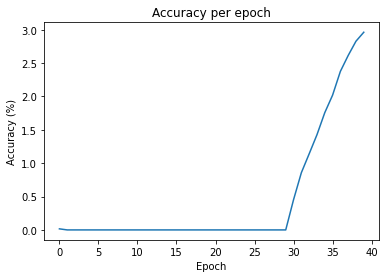

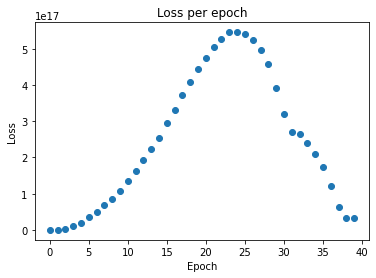

In [7]:
#Plotting the accuracy and loss per epoch
plt.plot(range(len(history.history['accuracy'])), [x * 100 for x in history.history['accuracy']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per epoch')
plt.show()

plt.scatter(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.show()

In [8]:
#Saving the model
model.save('cnn1.h5')

In [9]:
#The model will be tested on a random image and the prediction will be output

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#Function to load an image
def load_image(filename):
    image = load_img(filename, target_size = (32, 32))
    image = img_to_array(image)
    image = image.reshape(1, 32, 32, 3)
    image = image.astype('float32')
    image = image / 255.0
    return image
 
#Predicting the class of an image
def run_model():
    image = load_image('bird.png')
    model = load_model('cnn1.h5')
    result = model.predict_classes(image)
    print(result[0]) 

In [12]:
run_model()
#The output is 3, or cat, but the picture is a bird. 
#Therefore, the classifier is not correct, even after running mutliple times.

3
